In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [22]:
test = pd.read_csv('gender_submission.csv')
train_df = pd.read_csv('train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']


In [57]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,  test_size=0.2, random_state=42)


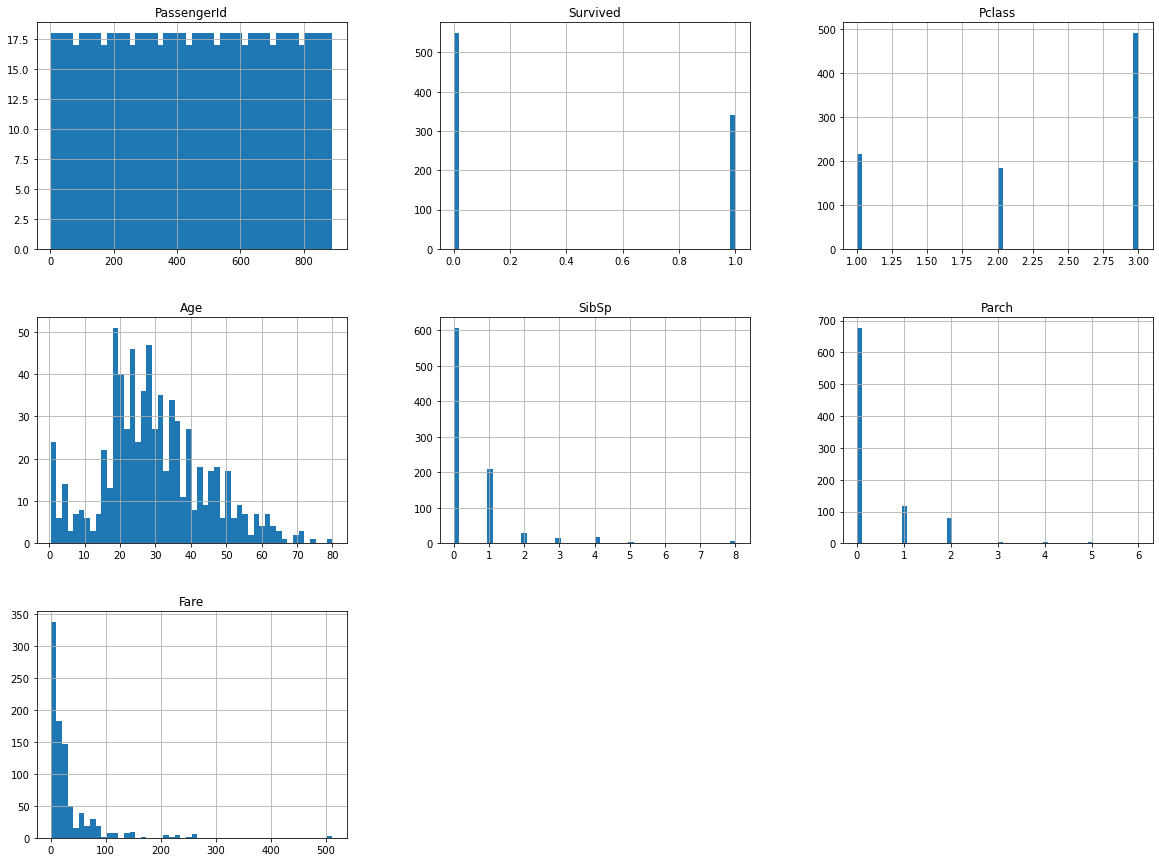

In [28]:
train_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [29]:
data = train_df.copy()

In [30]:
# data = data.drop('Sex', axis=1)
corr_matrix = train_df.corr()
# corr_matrix['Survived'].sort_values(ascending=False)

<AxesSubplot:>

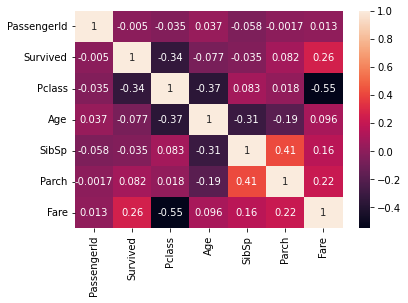

In [31]:
sns.heatmap(corr_matrix, annot=True )


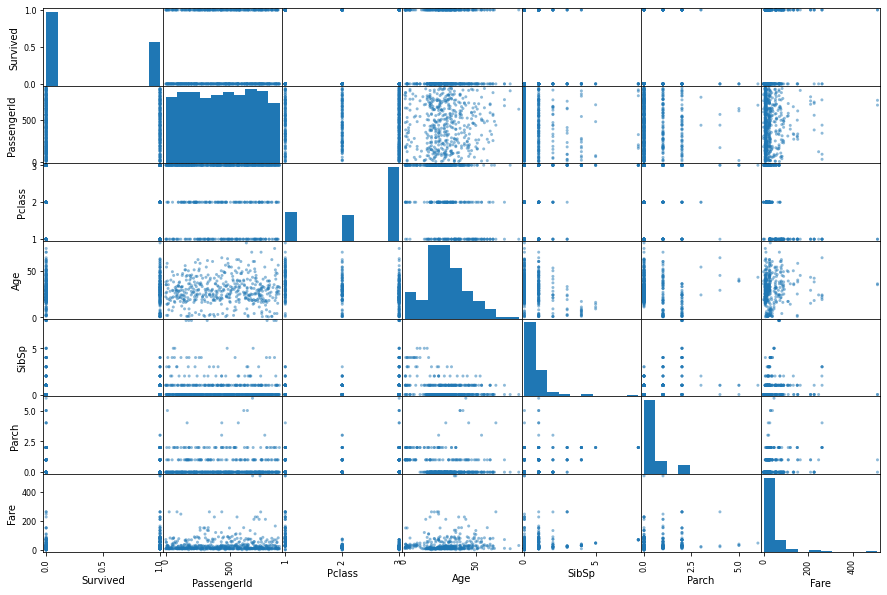

In [87]:
features = ['Survived', 'PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
scatter_matrix(data[features], figsize=(15, 10))
plt.show()

<AxesSubplot:ylabel='Frequency'>

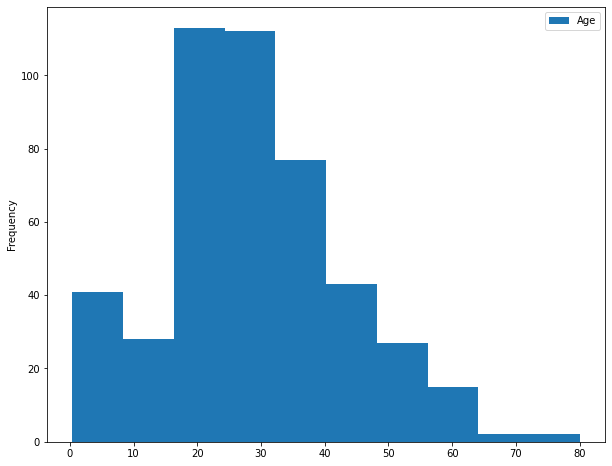

In [88]:
data.plot(kind='hist', x='Survived', y='Age', figsize=(10, 8))

In [33]:
df = train_df.copy()
df_label = df['Survived'].copy()
df = df.drop(['Survived', 'Name', 'Cabin', 'Ticket'], axis=1)
df_num = df.drop( 'Embarked', axis=1)
df_num

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,male,22.0,1,0,7.2500
1,2,1,female,38.0,1,0,71.2833
2,3,3,female,26.0,0,0,7.9250
3,4,1,female,35.0,1,0,53.1000
4,5,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000
887,888,1,female,19.0,0,0,30.0000
888,889,3,female,NaN,1,2,23.4500
889,890,1,male,26.0,0,0,30.0000


In [35]:
from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# imputer.fit(df_num)
# X = imputer.transform(df_num)
# df_num_impute_tr = pd.DataFrame(X, columns=df_num.columns)
# df_num_impute_tr.info()
# df_num_impute_tr.head()

# df['Embarked'].unique()



In [92]:
df['Embarked'].unique()

array(['Q', 'S', 'C', nan], dtype=object)

In [93]:
df_num['Sex']
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 517 to 131
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  569 non-null    int64  
 1   Pclass       569 non-null    int64  
 2   Sex          569 non-null    object 
 3   Age          460 non-null    float64
 4   SibSp        569 non-null    int64  
 5   Parch        569 non-null    int64  
 6   Fare         569 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 35.6+ KB


In [59]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer



class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

x = df_num.drop(['PassengerId','Sex', 'SibSp', 'Parch'], axis=1)

num_attrs = list(x)



num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), 
    ])



cat_attrs = ['Embarked']

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)), 
    ('Simple imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('one_hote_encoder', OrdinalEncoder())
    ])

cat1_attrs = ['Sex']

cat1_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat1_attrs)), 
    ('one_hote_encoder', OrdinalEncoder())
    ])


full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline), 
    ('cat_pipeline', cat_pipeline),
    ('cat1_pipeline', cat1_pipeline)
    ])

titanic_prepared = full_pipeline.fit_transform(X_train)
titanic_prepared_df = pd.DataFrame(titanic_prepared,  columns=['Pclass', 'Age', 'Fare',
                                                               'Embarked', 'Sex'])

titanic_prepared_t = full_pipeline.fit_transform(X_test)
titanic_prepared_t_df = pd.DataFrame(titanic_prepared_t,  columns=['Pclass', 'Age', 'Fare',
                                                               'Embarked', 'Sex'])

titanic_prepared_df.head(10)


,Pclass,Age,Fare,Embarked,Sex
0,1.0,45.5,28.5000,2.0,1.0
1,2.0,23.0,13.0000,2.0,1.0
2,3.0,32.0,7.9250,2.0,1.0
3,3.0,26.0,7.8542,2.0,1.0
4,3.0,6.0,31.2750,2.0,0.0
5,1.0,24.0,247.5208,0.0,1.0
6,1.0,45.0,26.5500,2.0,1.0
7,2.0,29.0,27.7208,0.0,1.0
8,3.0,28.0,7.8958,2.0,1.0
9,1.0,28.0,35.5000,2.0,1.0


In [107]:
from sklearn.linear_model import Perceptron

perceptron_log = Perceptron()
perceptron_log.fit(titanic_prepared_df, y_train)

print('Prediction:\t', perceptron_log.predict(titanic_prepared_t_df))
perceptron_predict = perceptron_log.predict(titanic_prepared_t_df)
print('Labels:\t\t', list(df_label))

Prediction:	 [1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1]
Labels:		 [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 

In [109]:
from sklearn.metrics import classification_report

print(classification_report(perceptron_predict, y_test))


              precision    recall  f1-score   support

           0       0.48      0.94      0.63        53
           1       0.96      0.56      0.71       126

    accuracy                           0.68       179
   macro avg       0.72      0.75      0.67       179
weighted avg       0.82      0.68      0.69       179

